Load dataset

In [ ]:
import pandas as pd

# Load Dataset
df = pd.read_csv("/content/supermarket_sales_data_1000.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month for monthly sales analysis
df['Month'] = df['Date'].dt.month

# Display first 5 rows to verify preprocessing
print(df.head())
print(df.tail())


Missing Values:
 Date                    0
Product ID              0
Product Name            0
Category                0
Quantity Sold           0
Stock Available         0
Expiry Date           393
Sales Price             0
Discount Applied        0
Customer Footfall       0
Weekday/Weekend         0
Holidays/Festivals      0
Weather Condition       0
dtype: int64
        Date  Product ID Product Name    Category  Quantity Sold  \
0 2024-02-26        7565       Grapes      Fruits             10   
1 2024-02-13        7082    Croissant      Bakery             24   
2 2024-02-26        1921    Milkshake   Beverages             30   
3 2024-02-24        4573     Broccoli  Vegetables             26   
4 2024-02-22        4668      Bananas      Fruits             16   

   Stock Available Expiry Date  Sales Price  Discount Applied  \
0                0  2024-03-02        48.53                20   
1               17         NaN        31.11                 0   
2              113         N

Handling missing values

In [ ]:
# Drop rows if missing values are minimal
df.dropna(inplace=True)



# Display the first few rows
print(df.head())


        Date  Product ID Product Name    Category  Quantity Sold  \
0 2024-02-26        7565       Grapes      Fruits             10   
3 2024-02-24        4573     Broccoli  Vegetables             26   
4 2024-02-22        4668      Bananas      Fruits             16   
7 2024-01-17        6368       Cheese       Dairy             28   
9 2024-02-26        8532      Carrots  Vegetables             43   

   Stock Available Expiry Date  Sales Price  Discount Applied  \
0                0  2024-03-02        48.53                20   
3               26  2024-03-04        20.33                 5   
4              164  2024-03-08        37.80                10   
7               19  2024-01-31        28.62                 0   
9               82  2024-03-08        18.05                 0   

   Customer Footfall Weekday/Weekend  Holidays/Festivals Weather Condition  \
0                203         Weekday                   0              Cold   
3                493         Weekend        

Handling outliers

In [ ]:
import numpy as np

# Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# IQR-based outlier removal
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply IQR filtering to each numeric column
for col in numeric_cols:
    original_len = len(df)
    df = remove_outliers_iqr(df, col)
    print(f"Removed outliers from '{col}': {original_len - len(df)} rows removed")

# Final shape after outlier removal
print("✅ Final dataset shape after removing outliers:", df.shape)


Removed outliers from 'Product ID': 0 rows removed
Removed outliers from 'Quantity Sold': 0 rows removed
Removed outliers from 'Stock Available': 0 rows removed
Removed outliers from 'Sales Price': 0 rows removed
Removed outliers from 'Discount Applied': 0 rows removed
Removed outliers from 'Customer Footfall': 0 rows removed
Removed outliers from 'Holidays/Festivals': 47 rows removed
Removed outliers from 'Month': 0 rows removed
✅ Final dataset shape after removing outliers: (560, 14)


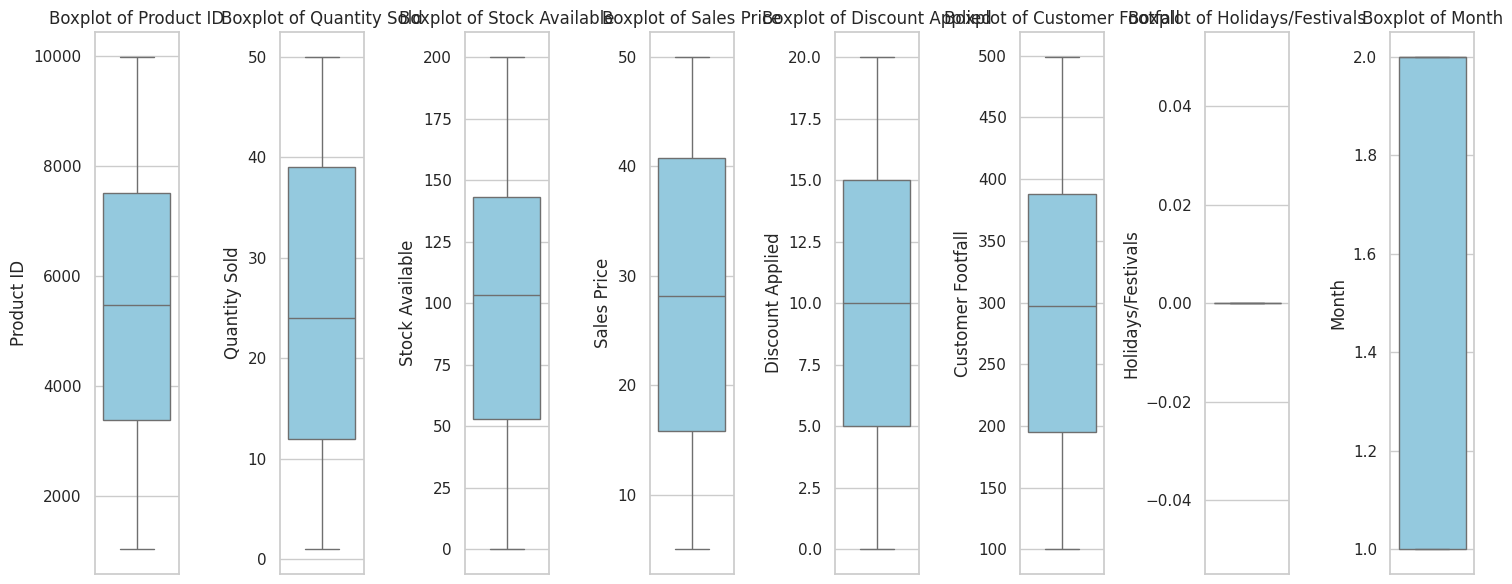

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Create boxplots for all numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, len(numeric_cols), i)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()

plt.show()


Monthly Sales Summary

📆 Monthly Sales (Total Quantity Sold):
 Month
1    6743
2    7250
Name: Quantity Sold, dtype: int64


<ipython-input-30-aaf240f8898a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues_d')
<ipython-input-30-aaf240f8898a>:21: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


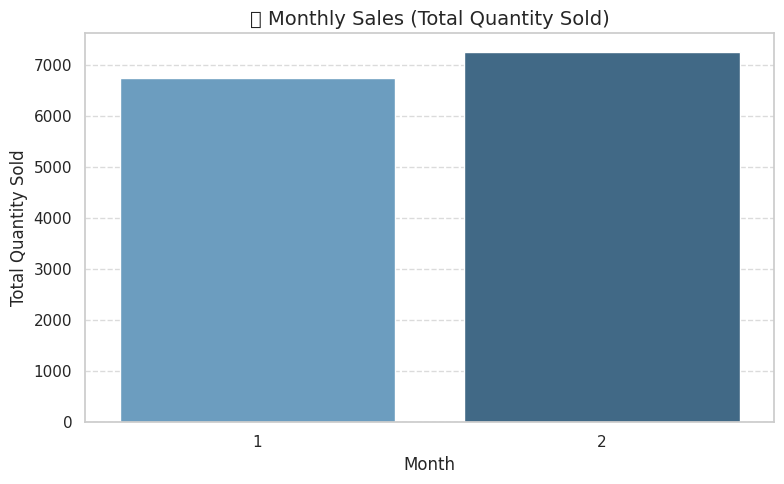

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Total sales per month
monthly_sales = df.groupby('Month')['Quantity Sold'].sum().sort_index()
print("📆 Monthly Sales (Total Quantity Sold):\n", monthly_sales)

import matplotlib.pyplot as plt
import seaborn as sns

# Group by Month to get total Quantity Sold
monthly_sales = df.groupby('Month')['Quantity Sold'].sum().sort_index()

# Plotting bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='Blues_d')
plt.title("📊 Monthly Sales (Total Quantity Sold)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.xticks(ticks=range(len(monthly_sales)), labels=monthly_sales.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


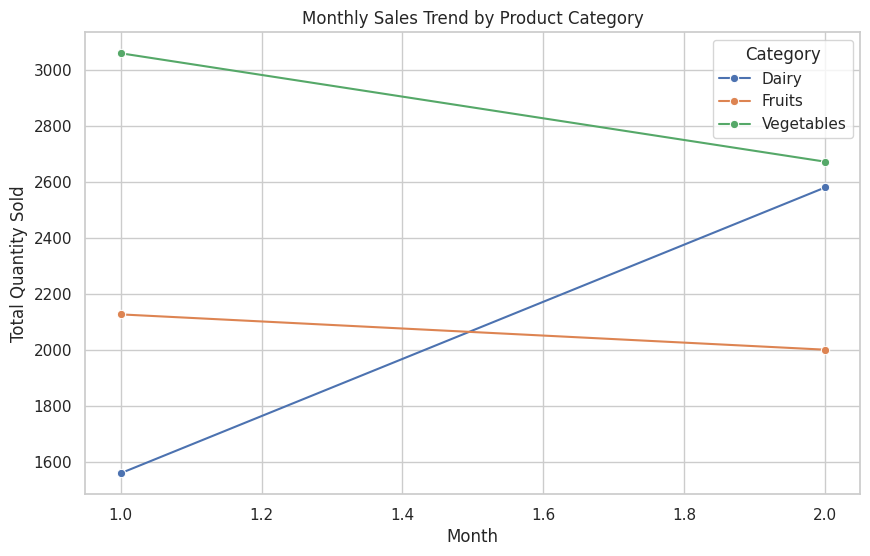

In [ ]:
monthly_category_sales = df.groupby(['Month', 'Category'])['Quantity Sold'].sum().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_category_sales, x='Month', y='Quantity Sold', hue='Category', marker='o')
plt.title("Monthly Sales Trend by Product Category")
plt.xlabel("Month")
plt.ylabel("Total Quantity Sold")
plt.grid(True)
plt.show()


Product Category Performance


 Product Category Sales Performance:
 Category
Vegetables    5729
Dairy         4138
Fruits        4126
Name: Quantity Sold, dtype: int64

 Best-Selling Category: Vegetables
📉 Least-Selling Category: Fruits


<ipython-input-22-2e64f53419cd>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')


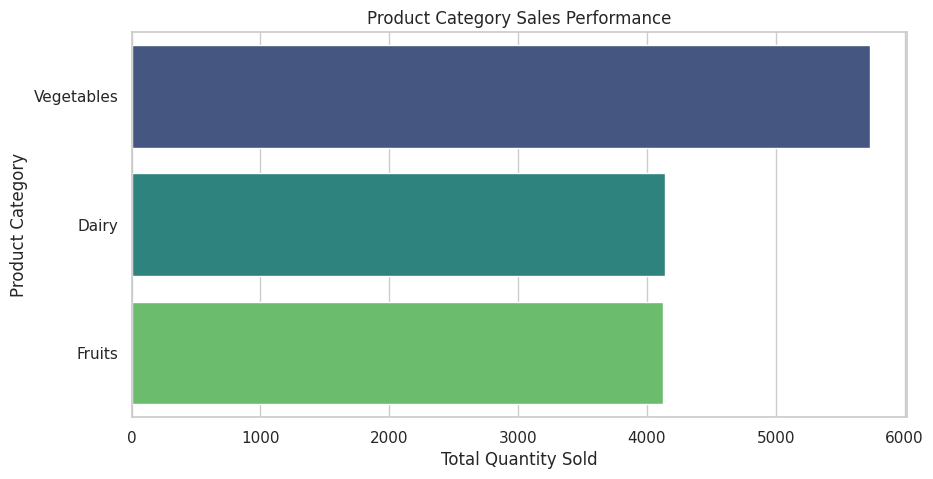

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Sales per product category
category_sales = df.groupby('Category')['Quantity Sold'].sum().sort_values(ascending=False)
print("\n Product Category Sales Performance:\n", category_sales)

# Best and worst performing category
best_category = category_sales.idxmax()
worst_category = category_sales.idxmin()
print(f"\n Best-Selling Category: {best_category}")
print(f"📉 Least-Selling Category: {worst_category}")

category_sales = df.groupby('Category')['Quantity Sold'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='viridis')
plt.title("Product Category Sales Performance")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Category")
plt.show()

Sales Impact from Other Features

In [ ]:
# Average sales grouped by feature
footfall_sales = df.groupby('Customer Footfall')['Quantity Sold'].mean().sort_values(ascending=False)
discount_sales = df.groupby('Discount Applied')['Quantity Sold'].mean().sort_values(ascending=False)
stock_sales = df.groupby('Stock Available')['Quantity Sold'].mean().sort_values(ascending=False)

print("\n Footfall vs Avg Sales:\n", footfall_sales.head(5))
print("\n Discount vs Avg Sales:\n", discount_sales.head(5))
print("\n Stock vs Avg Sales:\n", stock_sales.head(5))



 Footfall vs Avg Sales:
 Customer Footfall
282    50.0
367    50.0
154    49.0
206    49.0
142    49.0
Name: Quantity Sold, dtype: float64

 Discount vs Avg Sales:
 Discount Applied
15    26.203704
10    25.464286
20    25.281250
0     25.267442
5     23.031746
Name: Quantity Sold, dtype: float64

 Stock vs Avg Sales:
 Stock Available
45     48.0
173    48.0
25     47.0
116    45.0
46     45.0
Name: Quantity Sold, dtype: float64


Correlation Matrix

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame

# Select only numeric features for correlation
numeric_df = df.select_dtypes(include=np.number)

# Calculate correlation with 'Quantity Sold'
correlation = numeric_df.corr()['Quantity Sold'].sort_values(ascending=False)
print("\n📊 Correlation with Quantity_Sold:\n", correlation)


📊 Correlation with Quantity_Sold:
 Quantity Sold         1.000000
Customer Footfall     0.049123
Discount Applied      0.036021
Product ID            0.018632
Sales Price           0.013917
Stock Available      -0.005222
Month                -0.011477
Holidays/Festivals         NaN
Name: Quantity Sold, dtype: float64


In [ ]:
# One-hot encode 'Product_Category'
df_encoded = pd.get_dummies(df, columns=['Category'], drop_first=True)

# Define features and target
features = ['Customer Footfall', 'Stock Available', 'Discount Applied', 'Month'] + \
           [col for col in df_encoded.columns if col.startswith('Category_')]
X = df_encoded[features]
y = df_encoded['Quantity Sold']

print("✅ Selected Features:\n", X.columns.tolist())


✅ Selected Features:
 ['Customer Footfall', 'Stock Available', 'Discount Applied', 'Month', 'Category_Fruits', 'Category_Vegetables']


Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)

    results.append((name, mse, mae, r2))

# Display results
print("📊 Model Performance:\n")
for name, mse, mae, r2 in results:
    print(f"{name} ➤ MSE: {mse:.2f}, MAE: {mae:.2f}, R² Score: {r2:.2f}")


📊 Model Performance:

Linear Regression ➤ MSE: 219.47, MAE: 12.97, R² Score: -0.04
Decision Tree ➤ MSE: 185.32, MAE: 8.00, R² Score: 0.12
Random Forest ➤ MSE: 105.09, MAE: 7.65, R² Score: 0.50
Support Vector Regressor ➤ MSE: 213.01, MAE: 12.63, R² Score: -0.01
Neural Network ➤ MSE: 231.69, MAE: 12.60, R² Score: -0.10


In [ ]:
import numpy as np

print("📊 Model Performance Metrics:\n")
print(f"{'Model':<25} {'MAE':<10} {'RMSE':<10} {'R² Score':<10}")
print("-" * 55)

for name, model in models.items():
    preds = model.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    print(f"{name:<25} {mae:<10.2f} {rmse:<10.2f} {r2:<10.2f}")


📊 Model Performance Metrics:

Model                     MAE        RMSE       R² Score  
-------------------------------------------------------
Linear Regression         12.97      14.81      -0.04     
Decision Tree             8.00       13.61      0.12      
Random Forest             7.65       10.25      0.50      
Support Vector Regressor  12.63      14.59      -0.01     
Neural Network            12.60      15.22      -0.10     


In [ ]:
# 1. Predict quantity sold using the trained Random Forest model
rf_model = models['Random Forest']  # Already trained
y_pred = rf_model.predict(X_test)

# 2. Create a dataframe with actual vs predicted sales
results_df = X_test.copy()
results_df['Actual_Sales'] = y_test.values
results_df['Predicted_Sales'] = y_pred

# 3. Calculate restocking quantity: Predicted - Stock_Available
results_df['Restock_Needed'] = results_df['Predicted_Sales'] - results_df['Stock Available']
results_df['Restock_Needed'] = results_df['Restock_Needed'].apply(lambda x: max(x, 0))  # no negative restock

# 4. Preview results
print(results_df[['Actual_Sales', 'Predicted_Sales', 'Stock Available', 'Restock_Needed']].head(10))


     Actual_Sales  Predicted_Sales  Stock Available  Restock_Needed
807            31            27.13               37            0.00
607            23            23.25              131            0.00
306            24            22.87              111            0.00
154             7            14.19                7            7.19
595            44            39.81                0           39.81
240            39            38.98              114            0.00
501            10            36.25               59            0.00
535            11            14.60               12            2.60
180             6            22.52               74            0.00
935            43            17.72              145            0.00


In [ ]:
# First, make sure Product_ID is part of the test set
# This assumes you stored it earlier from the original dataframe
X_test_with_id = X_test.copy()
X_test_with_id['Product ID'] = df.loc[X_test.index, 'Product ID'].values

# Predict using Random Forest
rf_model = models['Random Forest']
y_pred = rf_model.predict(X_test)

# Build final results dataframe
results_df = X_test_with_id.copy()
results_df['Actual_Sales'] = y_test.values
results_df['Predicted_Sales'] = y_pred
results_df['Stock Available'] = df.loc[X_test.index, 'Stock Available'].values
results_df['Restock_Needed'] = (results_df['Predicted_Sales'] - results_df['Stock Available']).apply(lambda x: max(x, 0))

# Show output with Product_ID
print(results_df[['Product ID', 'Actual_Sales', 'Predicted_Sales', 'Stock Available', 'Restock_Needed']].head(10))


     Product ID  Actual_Sales  Predicted_Sales  Stock Available  \
807        3991            31            27.13               37   
607        8900            23            23.25              131   
306        7246            24            22.87              111   
154        4371             7            14.19                7   
595        5386            44            39.81                0   
240        3698            39            38.98              114   
501        8691            10            36.25               59   
535        8401            11            14.60               12   
180        1839             6            22.52               74   
935        8709            43            17.72              145   

     Restock_Needed  
807            0.00  
607            0.00  
306            0.00  
154            7.19  
595           39.81  
240            0.00  
501            0.00  
535            2.60  
180            0.00  
935            0.00  


<ipython-input-48-873aec576dfe>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restock_by_category.values, y=restock_by_category.index, palette="crest")


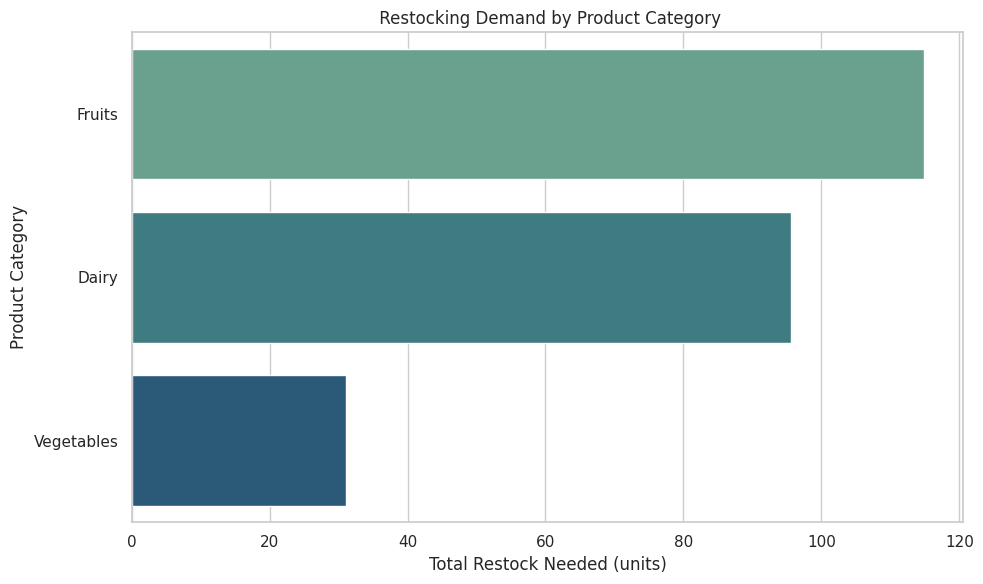

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge 'Restock_Needed' from results_df into df using the shared index
df = df.merge(results_df[['Restock_Needed']], left_index=True, right_index=True, how='left')

# Now group by 'Category' and sum 'Restock_Needed'
restock_by_category = df.groupby('Category')['Restock_Needed'].sum().sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=restock_by_category.values, y=restock_by_category.index, palette="crest")
plt.xlabel("Total Restock Needed (units)")
plt.ylabel("Product Category")
plt.title(" Restocking Demand by Product Category")
plt.tight_layout()
plt.show()

<ipython-input-49-43024a18469e>:19: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


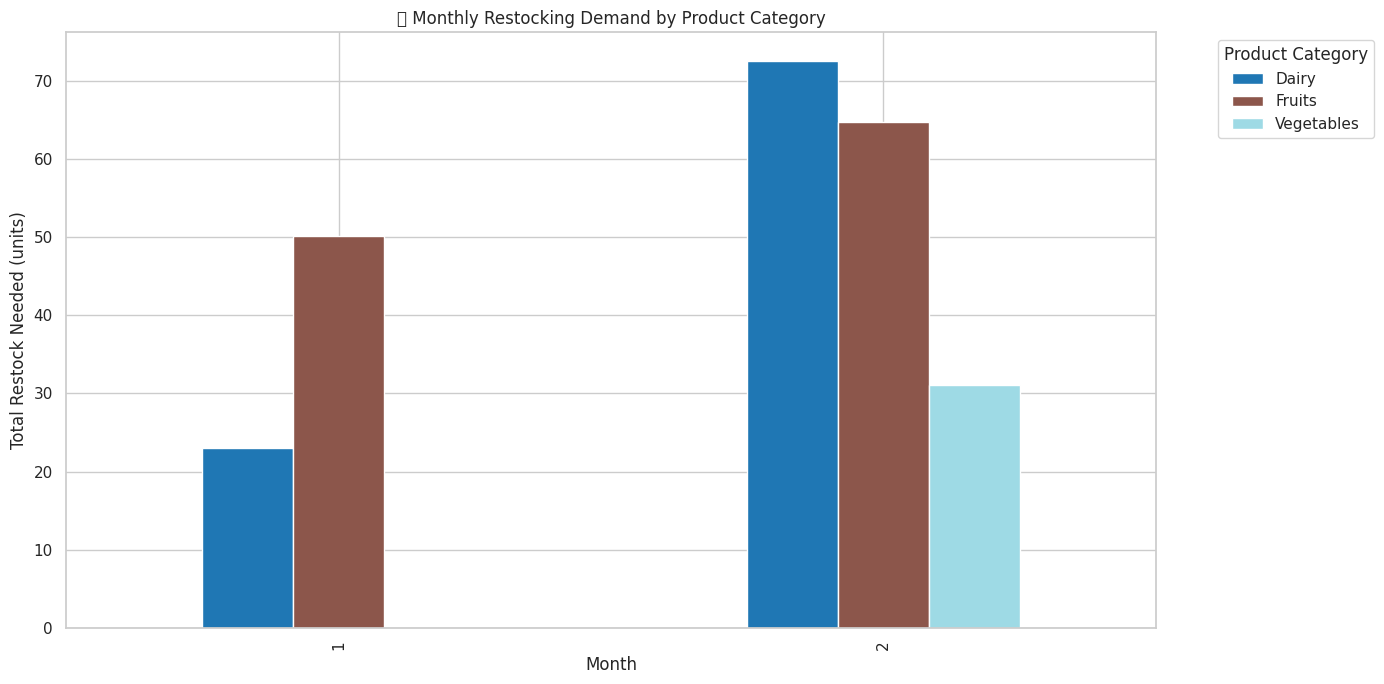

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Month' column is present
df['Month'] = pd.to_datetime(df['Date']).dt.month

# Group by Month and Product Category, then sum Restock_Needed
monthly_restock = df.groupby(['Month', 'Category'])['Restock_Needed'].sum().reset_index()

# Pivot for heatmap or grouped bar chart
pivot_data = monthly_restock.pivot(index='Month', columns='Category', values='Restock_Needed')

# Plot grouped bar chart
pivot_data.plot(kind='bar', figsize=(14, 7), colormap='tab20')
plt.title('📆 Monthly Restocking Demand by Product Category')
plt.xlabel('Month')
plt.ylabel('Total Restock Needed (units)')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
